In [1]:
pip install tensorflow

In [2]:
pip install keras

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow.keras import layers, models

1. Dataset Selection and Overview

Choose a challenging dataset that is suitable for regression analysis.

Provide a brief overview of the dataset, including the target variable and the features.

In [4]:
# Load the dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

In [5]:
# Overview of the dataset
print(df.head())
print(df.tail())
print(df.shape)
print(df.describe())
print(df.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.

2. Data Cleaning

Handle missing values, outliers, and other inconsistencies in the dataset.

Normalize or standardize the data if necessary.

In [6]:
# Check for missing values
print(df.isnull().sum())

# Outliers can be detected using IQR or Z-score methods
# Here, let's just standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


3. Exploratory Data Analysis (EDA)

Visualize the distribution of the target variable and the features.

Investigate relationships between the features and the target variable.

Check for multicollinearity among the features.

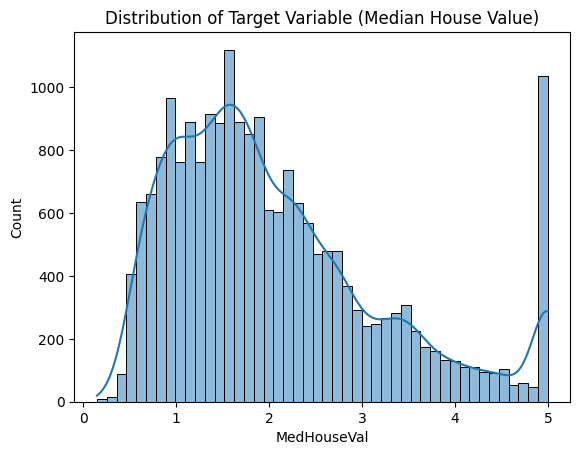

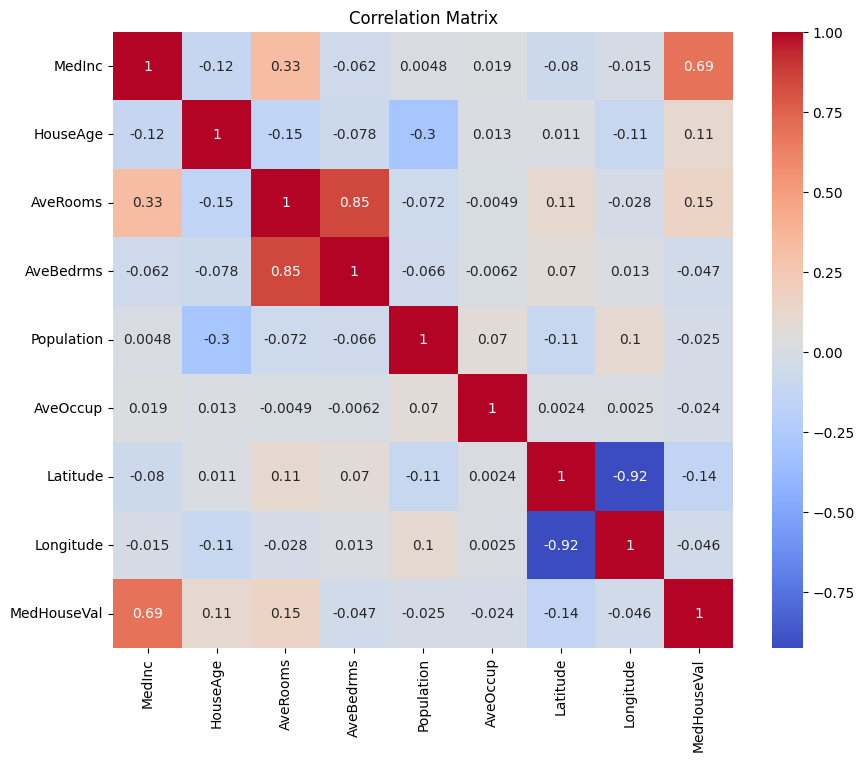

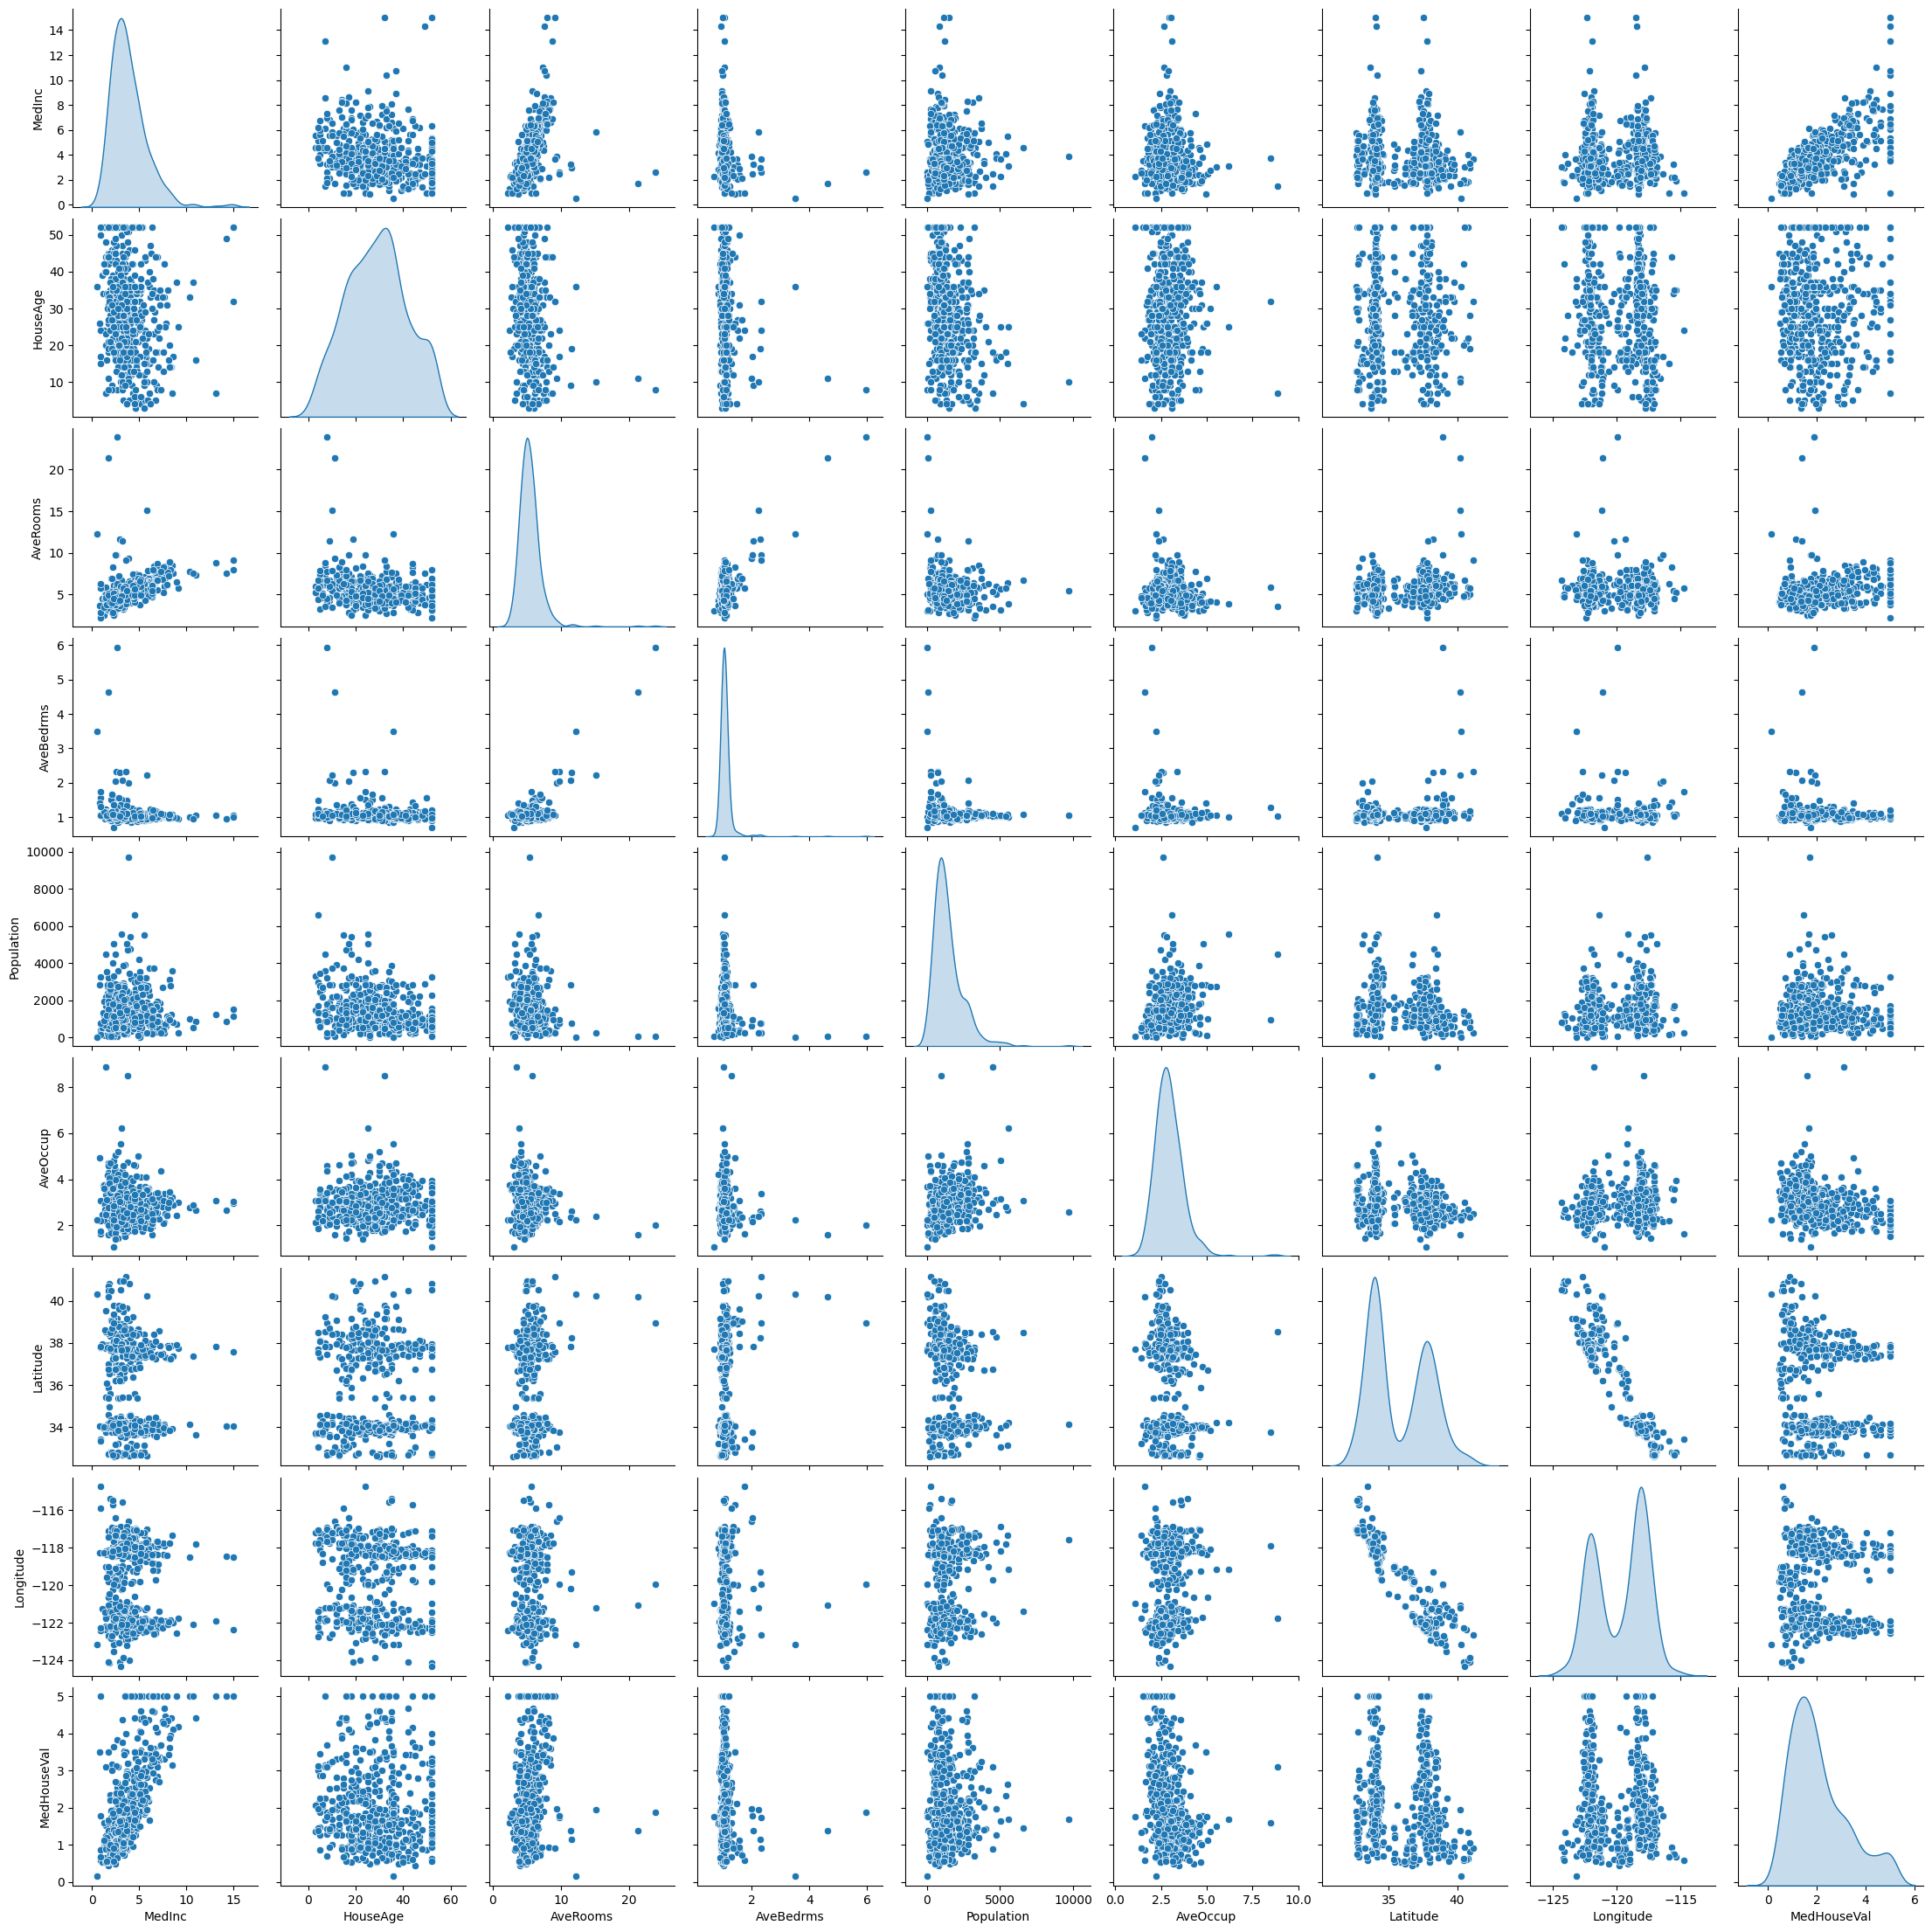

In [7]:
# Distribution of the target variable
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Target Variable (Median House Value)')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships
sns.pairplot(df.sample(500), diag_kind='kde')
plt.show()


4. Data Transformation

Apply transformations to the data if needed (e.g., log transformations, polynomial features).

Scale the data if required.

In [8]:
# Log transformation can be applied if the data is highly skewed
df_transformed = df.copy()
df_transformed['MedHouseVal'] = np.log(df['MedHouseVal'])

# Splitting the data
X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Statistical Tests

Perform hypothesis tests to determine the statistical significance of the relationships.

Conduct any relevant tests for assumptions of linearity, normality, etc

In [9]:
from scipy.stats import ttest_ind

# Example: T-test to check if the mean house values are significantly different between two regions
df['HighMedInc'] = df['MedInc'] > df['MedInc'].median()
group1 = df[df['HighMedInc'] == True]['MedHouseVal']
group2 = df[df['HighMedInc'] == False]['MedHouseVal']

t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test statistic: {t_stat}, P-value: {p_value}')


T-test statistic: 86.36305493693, P-value: 0.0


In [10]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}, MAE: {mean_absolute_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")


Linear Regression - RMSE: 0.6461245859158664, MAE: 0.4620739216082177, R2: 0.575787706032451
SVR - RMSE: 0.5141968141018728, MAE: 0.3433137123596501, R2: 0.7313359979350702
Random Forest - RMSE: 0.4381855134002088, MAE: 0.28549711389795884, R2: 0.8048957419164837
Decision Tree - RMSE: 0.6135477847763365, MAE: 0.3942349014515232, R2: 0.6174858531588274
Gradient Boosting - RMSE: 0.46983772820474023, MAE: 0.3220615932173341, R2: 0.7756911067024255


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


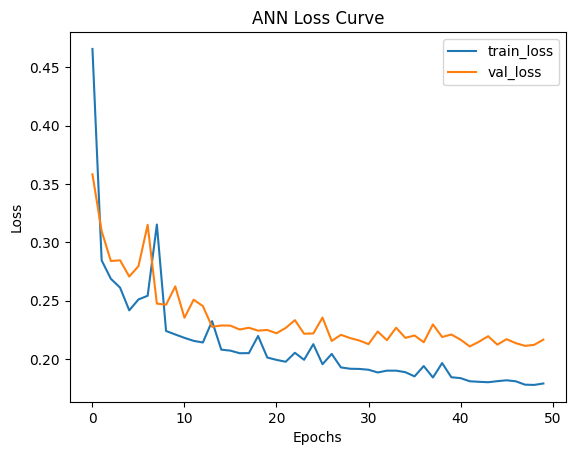

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN - RMSE: 0.4519528487590786, MAE: 0.3054019554505025, R2: 0.7924431967245158


In [11]:
from tensorflow.keras import layers, models
# Building the ANN model
ann_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse')

# Train the model and plot error curves
history = ann_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Loss Curve')
plt.show()

# Evaluate the model
y_pred_ann = ann_model.predict(X_test)
print(f"ANN - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ann))}, MAE: {mean_absolute_error(y_test, y_pred_ann)}, R2: {r2_score(y_test, y_pred_ann)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


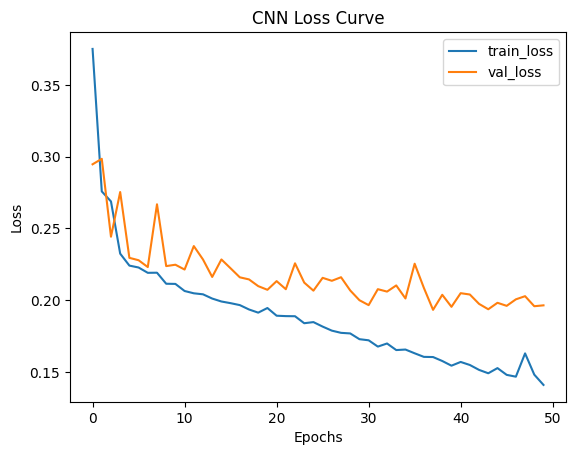

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN - RMSE: 0.4332940297275372, MAE: 0.2920220389450256, R2: 0.8092273436825195


In [12]:
# Reshape input for 1D convolution
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Building the CNN model
cnn_model = models.Sequential([
    layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.Conv1D(64, kernel_size=2, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model and plot error curves
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, validation_split=0.2, verbose=0)

# Plot the loss curve
plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss Curve')
plt.show()

# Evaluate the model
y_pred_cnn = cnn_model.predict(X_test_cnn)
print(f"CNN - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_cnn))}, MAE: {mean_absolute_error(y_test, y_pred_cnn)}, R2: {r2_score(y_test, y_pred_cnn)}")


In [13]:
# Rename the models dictionary to avoid conflicts
regressors = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}, MAE: {mean_absolute_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# After training the regressors, summarize their performances
performance_summary = {
    'Model': ['Linear Regression', 'SVR', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'ANN', 'CNN'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))) for regressor in regressors.values()] + [np.sqrt(mean_squared_error(y_test, y_pred_ann)), np.sqrt(mean_squared_error(y_test, y_pred_cnn))],
    'MAE': [mean_absolute_error(y_test, regressor.predict(X_test)) for regressor in regressors.values()] + [mean_absolute_error(y_test, y_pred_ann), mean_absolute_error(y_test, y_pred_cnn)],
    'R2': [r2_score(y_test, regressor.predict(X_test)) for regressor in regressors.values()] + [r2_score(y_test, y_pred_ann), r2_score(y_test, y_pred_cnn)]
}

# Create a DataFrame to summarize the performance
summary_df = pd.DataFrame(performance_summary)
print(summary_df)



Linear Regression - RMSE: 0.6461245859158664, MAE: 0.4620739216082177, R2: 0.575787706032451
SVR - RMSE: 0.5141968141018728, MAE: 0.3433137123596501, R2: 0.7313359979350702
Random Forest - RMSE: 0.43788632681169587, MAE: 0.2837633448028514, R2: 0.8051620795640305
Decision Tree - RMSE: 0.608387017669273, MAE: 0.39222625035939335, R2: 0.6238937131196209
Gradient Boosting - RMSE: 0.4698877762826126, MAE: 0.3220741526056764, R2: 0.7756433164710084
               Model      RMSE       MAE        R2
0  Linear Regression  0.646125  0.462074  0.575788
1                SVR  0.514197  0.343314  0.731336
2      Random Forest  0.437886  0.283763  0.805162
3      Decision Tree  0.608387  0.392226  0.623894
4  Gradient Boosting  0.469888  0.322074  0.775643
5                ANN  0.451953  0.305402  0.792443
6                CNN  0.433294  0.292022  0.809227
